# 1. Quizz

**Question 1: Agglomerative Hierarchical Clustering**

Agglomerative Hierarchical Clustering considers every point as a single cluster, and iteratively proceeds to combine clusters together until there is only one cluster left. This results in the creation of a 'tree', where the root is the final cluster (all the data) and the leaves are every data points. 

The way this method works is that at each iteration, the two closest clusters are merged. This way, the user can select the desired number of clusters, and the algorithm simply has to stop combining clusters when this number is reached.

Its main advantages are the fact that the user does not need to specify the number of clusters, as a cluster tree is essentially being built, and can choose to select the number of clusters after the tree is built to choose the configuration that yields the best results (for the task that is seeked). This algorithm is also robust with regards to its distance metric - ie. all distance metrics perform relatively similarly.

Its drawback is its complexity, which is O(n^3).

**Question 2:**

The function k-means is attempting to minimize the within-cluster variances. 

This means that at each iteration and for each cluster, a new center is computed which corresponds to the geometric mean of the points contained in the cluster (thus minimizing the sum of squared distances). Afterwards, the algorithm reclusters based on these new centers. This process is repeated until there is no change in the clusters anymore. 

In order to 'know' if the clustering is effective, after the algorithm converged a score is computed by summing the within-cluster variances. The algorithm will then recompute other clustering configurations. The best clustering configuration is the one that has the smallest within-cluster variances, which is why the function k-means is attempting to minimize the within-cluster variances. 



A MODIFIER

**Question 3:**



# 2. Programming assignment

In [2]:
import random 
import numpy as np
from numpy.random import uniform 
import warnings 

import pandas as pd
import plotly.express as px

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

Adjusting options for the inline figures

In [3]:
# Adjusting the resolution and format of the inline images

# Possible options: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
%config InlineBackend.figure_formats = ["retina"]
# %config InlineBackend.figure_formats = ["svg"]

In [16]:
# Setting the dpi of the inline figures
# plt.rcParams["figure.dpi"] = 200

In [17]:
# Available styles (these will change the colormap as well)

# Colorblind options; uncomment to select an option:
# plt.style.use("seaborn-colorblind")
# plt.style.use("tableau-colorblind10")

# To print all the possible options:
# plt.style.available

In [18]:
# Adjusting the colormap (also modified by the commands above)
# plt.rcParams["image.cmap"] = "cividis"

In [4]:
def scatter_blobs(X,y,title):
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    plt.title(title) 
    plt.show()

## K-means in scikit-learn 

We use the Gaussian blobs dataset to showcase K-means in scikit-learn.

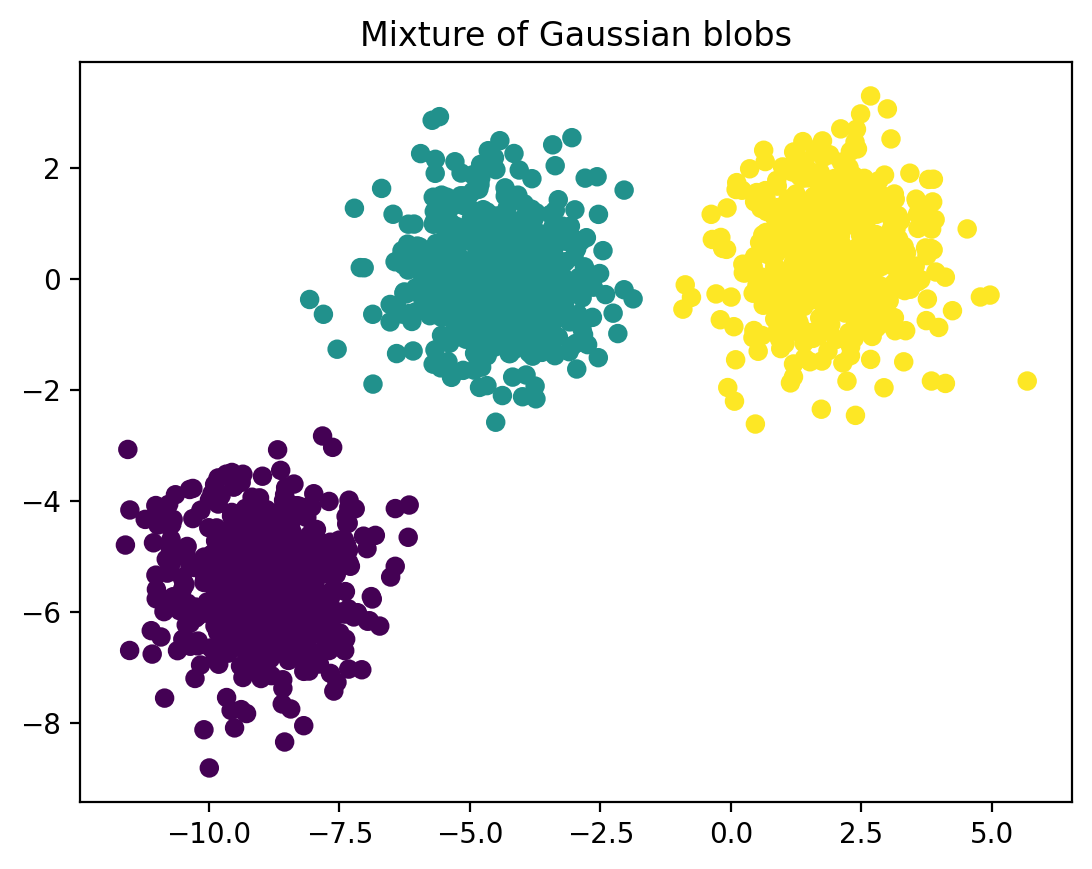

In [5]:
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

scatter_blobs(X,y,"Mixture of Gaussian blobs")

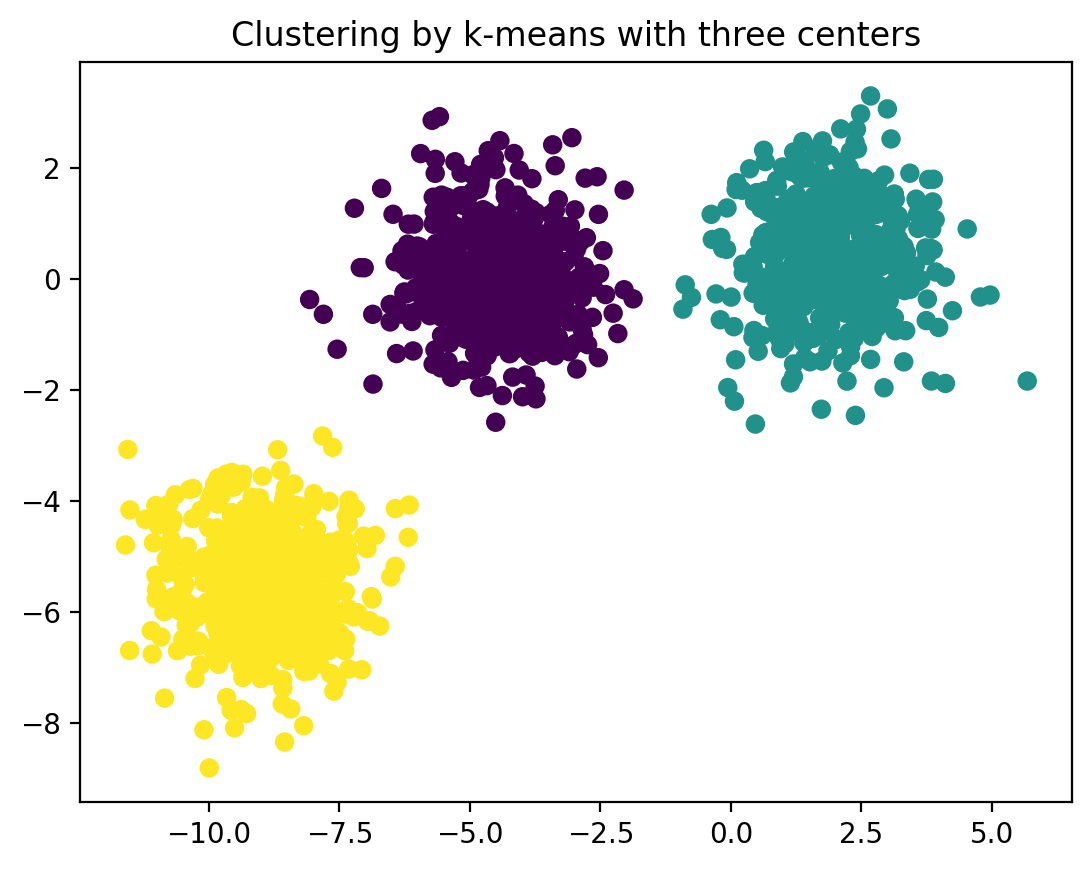

In [6]:
sklearn_kmean = KMeans(n_init=10, n_clusters=3)
sklearn_kmean.fit(X) 
scatter_blobs(X,sklearn_kmean.labels_,"Clustering by k-means with three centers")

## Q1 Implementing k-means from scratch

In this question, you are asked to implement the k-means Clustering Algorithm. The k-means algorithm requires you to specify the number k of clusters/groups a priori, as shown in above sklearn k-means implementation. 

The center of each cluster is a centroid. These centers are randomly initialized. After the initialization, we perform the following iterations to optimize the locations of the k centroids: 


```
repeat until convergence: 
     1. Calculate the distance from each point to each centroid.
     2. Assign each point to its nearest centroid. 
     3. Centroids are shifted to be the average value of the points belonging to the cluster. 
     (convergence criteria: the location of the centroids stops changing.) 
```

To measure how well a given dataset is clustered by k-means, we use a quantity called `inertia`, which is calculated by summing the squares of the distance between each data point and its corresponding centroid. A good model is one with a small number of clusters and small inertia.

Although we can use different measures of distance, for this homework, we only use the Euclidean distance as our metric. You are given a helper function `euclidean_dist2(point, data)`, which returns the Euclidean distance squared between a point to a dataset. 

You are provided the first part of the class `my_KMeans`, which you will need to complete. You are already given the `__init__` method, and the first part of `fit_transform(self, X_train)`. You should implement the rest of the member function to return the following quantities in this order: the location of the centroids with size `(n_clusters, m)`, the centroid indices with size `(n, )` (i.e., the index of the centroid the `X_train` belongs to), and inertia. We assume that `X_train` has size `(n, m)`.

In [7]:
def euclidean_dist2(point, data):
    """
    Squared Euclidean distance between data and point.
    Dimensions:
    data: (n,m)
    point: (m,)
    output: (n,)
    """
    return np.sum((point - data)**2, axis=1)

In [8]:
from numpy.lib.index_tricks import index_exp
class my_KMeans:

    def __init__(self, n_clusters=5, max_iter=300, init=None):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter 
        self.init = init

    def fit_transform(self, X_train):
        if self.init is not None:
            centroids = self.init 
        else: 
        # Randomly initialize the centers using the 'sklearns++' technique, which 
        # selects the initial cluster centroids using sampling based on an empirical probability 
        # distribution of the points’ contribution to the overall inertia. This technique
        # speeds up convergence.
            centroids = [random.choice(X_train)]
            for _ in range(self.n_clusters-1):
                # Calculate distances from points to the centroids
                dists = np.sum([np.sqrt(euclidean_dist2(centroid, X_train)) for centroid in centroids], axis=0)
                # Normalize the distances
                dists /= np.sum(dists)
                # Choose point based on their distances
                new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
                centroids += [X_train[new_centroid_idx]]

        iteration = 0 
        
        # start your implementation here!
        centers_changed = True

        while centers_changed and iteration < self.max_iter:
          # Calculate distances from points to the centroids, label each point with closest centroid
          dists = [np.sqrt(euclidean_dist2(centroid, X_train)) for centroid in centroids]
          points_label = np.argmin(dists, axis=0)

          # Compute cluster locations
          clusters = [[] for i in range(self.n_clusters)]
          for index, cluster in enumerate(points_label):
            clusters[cluster].append(X_train[index])
          for i, elem in enumerate(clusters):
            clusters[i] = np.average(elem, axis=0)

          # Compute inertia
          ls_inertia = [0 for i in range(self.n_clusters)]
          for index, cluster in enumerate(points_label):
            ls_inertia[cluster] += (np.linalg.norm(X_train[index] - clusters[cluster])**2)

          inertia = np.sum(ls_inertia)

          # Checking if the centers changed
          if np.array_equal(clusters, centroids):
            centers_changed = False

          centroids = clusters

        return clusters, points_label, inertia

To evaluate your implementation, compare the output of your k-means implementation with the k-means implementation from the Sklearn library. First, we should notice that the k-means algorithm is not deterministic due to the random initialization of the centroids. However, k-means becomes deterministic after we fix the initialization. 

In [35]:
n_samples = 300 

# number of failures 

num_of_mismatches = 0 

for i in range(100): 

    # Generating random Gaussian blobs dataset 
    n_centers = random.randint(2,5) 
    X, y = make_blobs(n_samples=n_samples, centers=n_centers) 

    # Randomly initialize the centers using the 'sklearns++' technique, which 
    # selects initial cluster centroids using sampling based on an empirical probability 
    # distribution of the points’ contribution to the overall inertia. This technique
    # speeds up convergence. 
    init_centroids = [random.choice(X)]
    for _ in range(n_centers-1):
        # Calculate distances from points to the centroids
        dists = np.sum([np.sqrt(euclidean_dist2(centroid, X)) for centroid in init_centroids], axis=0)
        # Normalize the distances
        dists /= np.sum(dists)
        # Choose remaining points based on their distances
        new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
        init_centroids += [X[new_centroid_idx]]

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sklearn_kmean = KMeans(n_clusters=n_centers, init=np.asarray(init_centroids), tol=1e-10) 
        sklearn_kmean.fit(X)
    my_kmean = my_KMeans(n_clusters=n_centers, init=init_centroids) 
    centroids, _, my_kmean_inertia = my_kmean.fit_transform(X) 

    if i % 10 == 0: 
        print(i) 

    if abs(sklearn_kmean.inertia_ - my_kmean_inertia) > 1: 
        num_of_mismatches += 1 
        print('sklearn_kmean.inertia:{:.3f}, my_kmean_inertia:{:.3f}'.format(
            sklearn_kmean.inertia_, my_kmean_inertia))
        assert num_of_mismatches < 5, 'too many mismatches!'
        
# You may see a few
# "[kmeans] empty cluster at iteration ..."
# and
# sklearn_kmean.inertia:XXX, my_kmean_inertia:XXX
# because of poor convergence due to a bad initialization.
# If your code works correctly, the number of mismatches should be less than 5.

0
10
20
30
40
50
60
70
80
90


## Q2 Select the optimal $k$ by looking at the graph of inertia vs $k$

For this question, you should implement the function` plot_inertia(X)`. This function will take in an input `X` and run your implementation `my_KMeans` multiple times with different hyperparameters `k` (i.e., the number of clusters). You should record the inertia value for different `k`, and make a plot of `k` vs `inertia`. Observe your graph and comment on how you should select the optimal value of `k` for k-means based on the graph. Is the optimal value you found close to the ground truth value? 

In [9]:
def plot_inertia(X): 
    # start your implementation here!
    ls_k = np.linspace(1, 10, 10)
    ls_inertia = []

    for k in ls_k:
      my_kmean = my_KMeans(n_clusters=int(k))
      _, _, inertia = my_kmean.fit_transform(X)
      ls_inertia.append(inertia)

    plt.plot(ls_k, ls_inertia)
    plt.xlabel('number of clusters k')
    plt.ylabel('inertia of the clustering')
    plt.title('Inertia vs number of clusters')

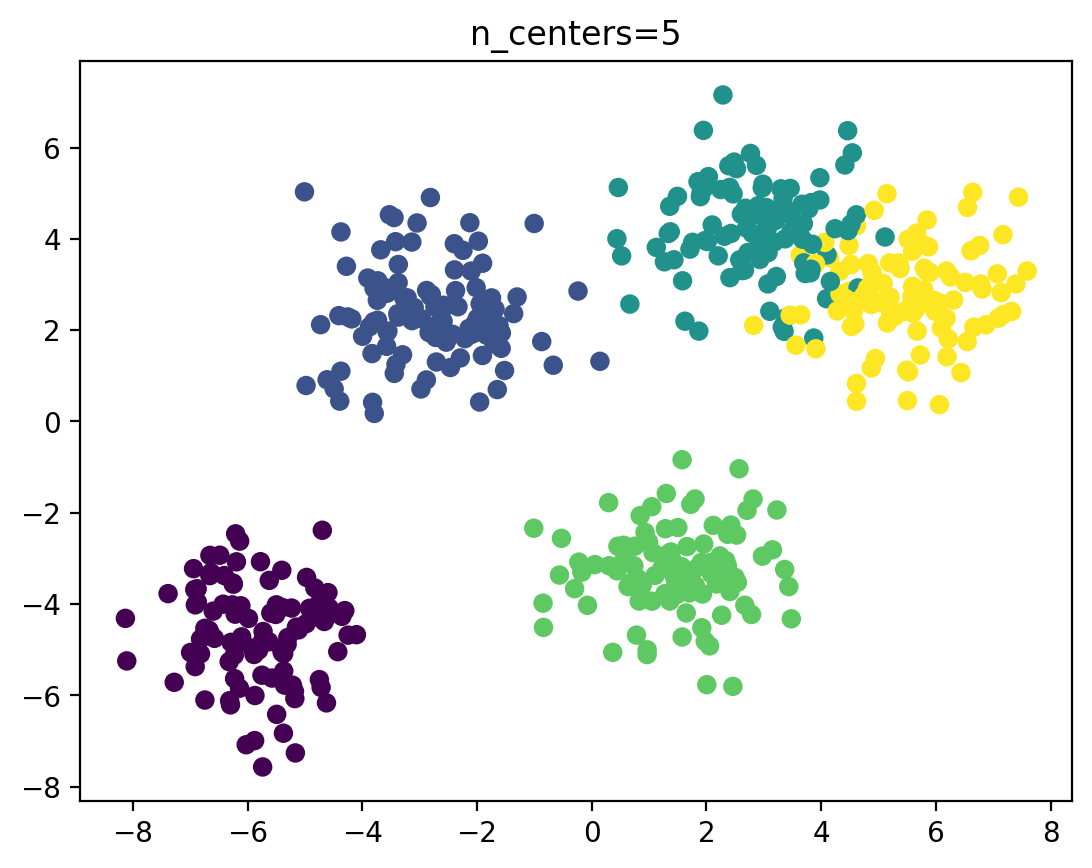

In [10]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=5)
scatter_blobs(X,y,"n_centers=5")

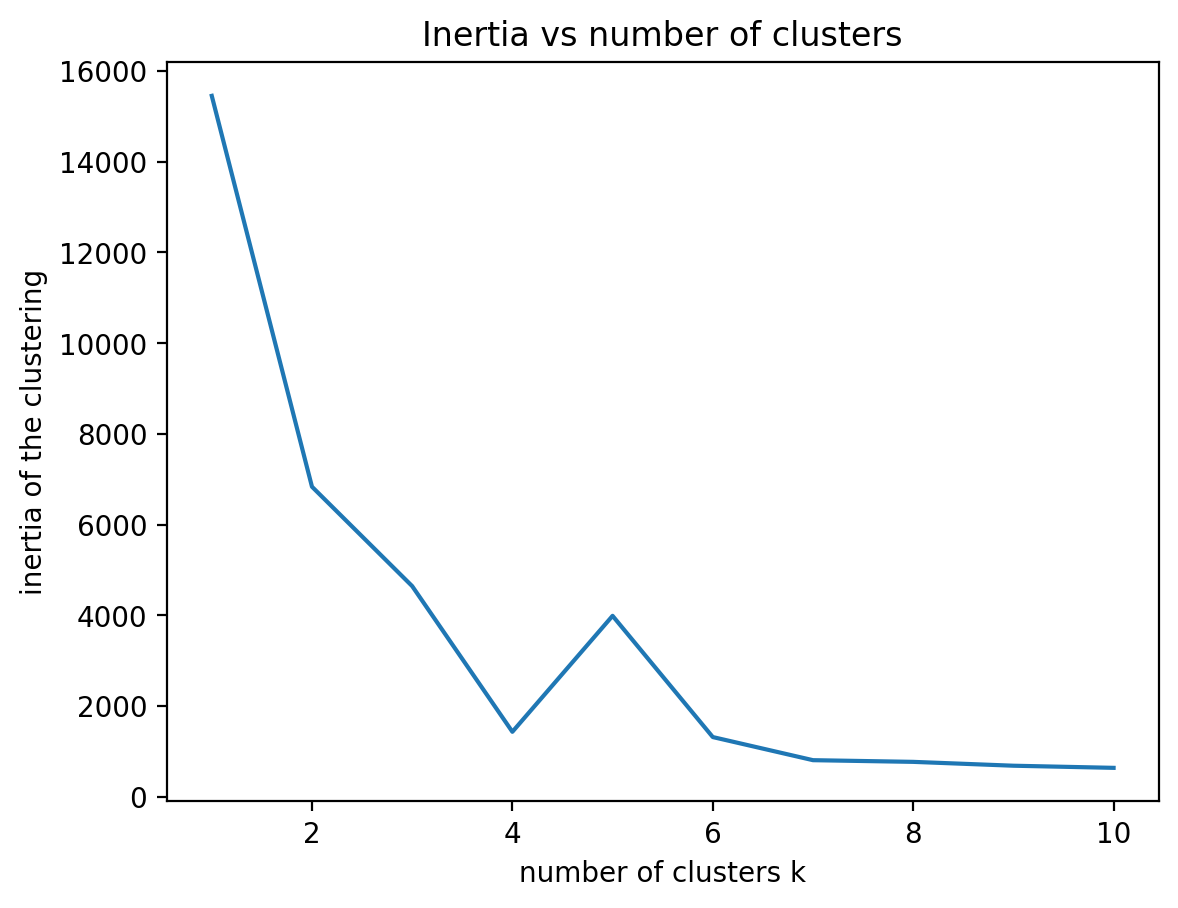

In [11]:
plot_inertia(X)

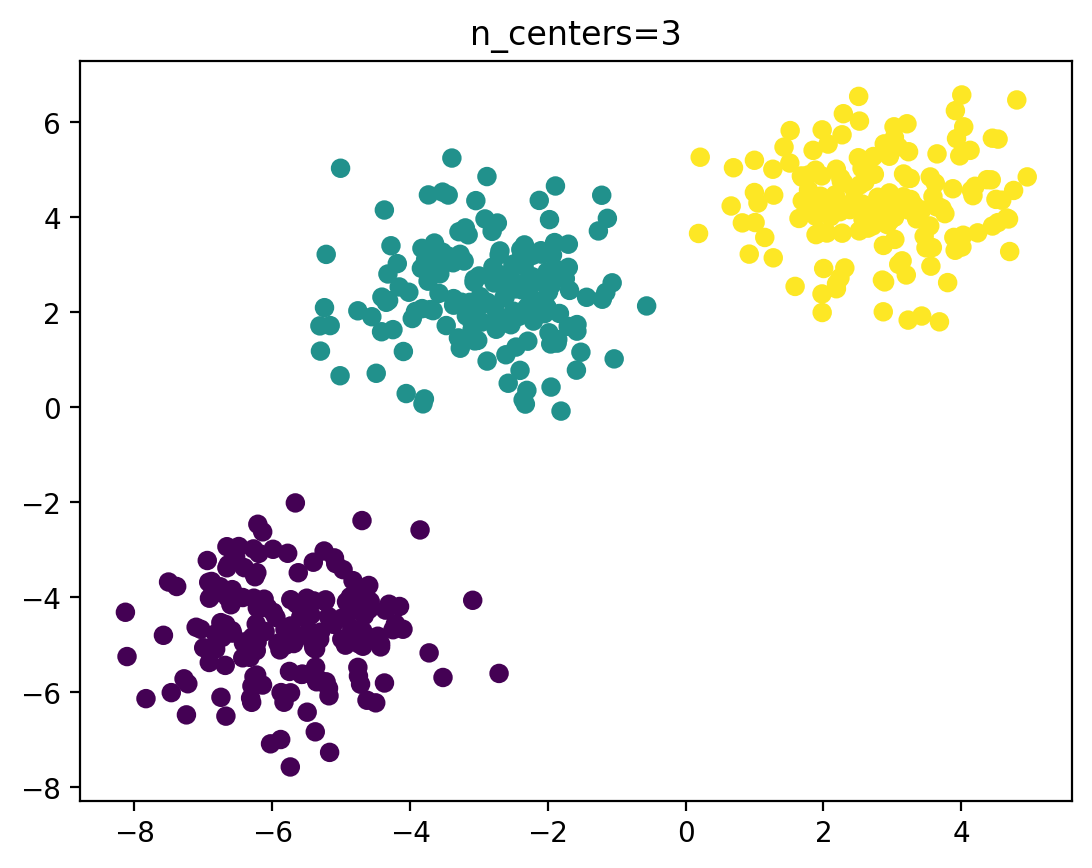

In [12]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=3) 
scatter_blobs(X,y,"n_centers=3")

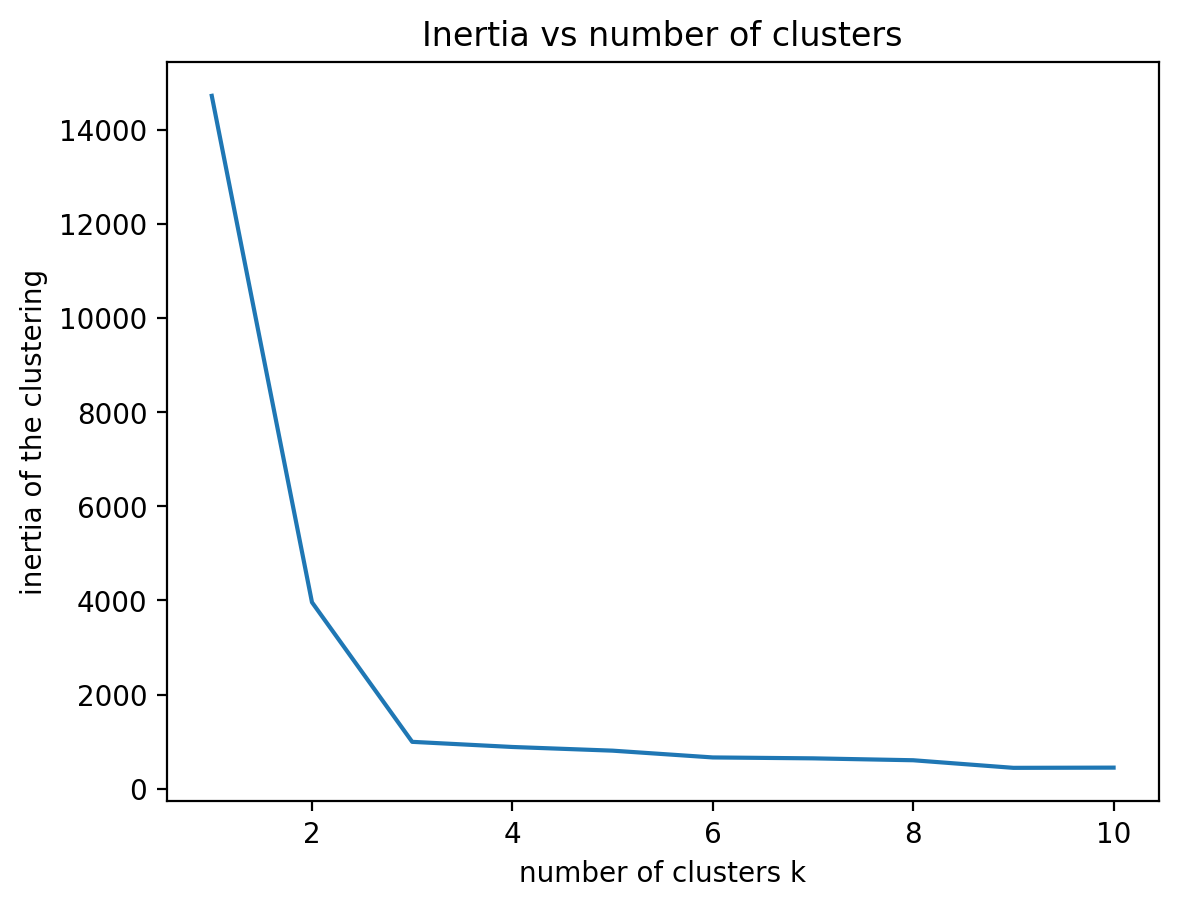

In [13]:
plot_inertia(X)

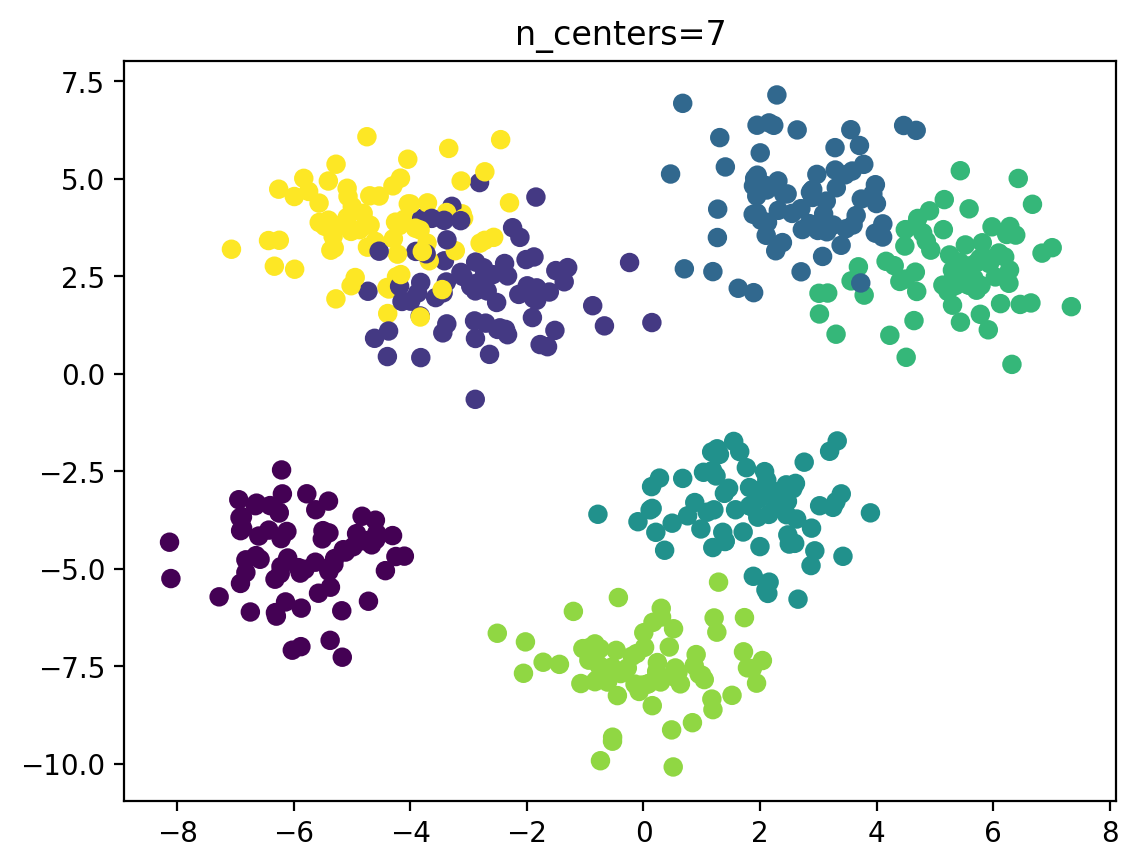

In [14]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=7) 
scatter_blobs(X,y,"n_centers=7")

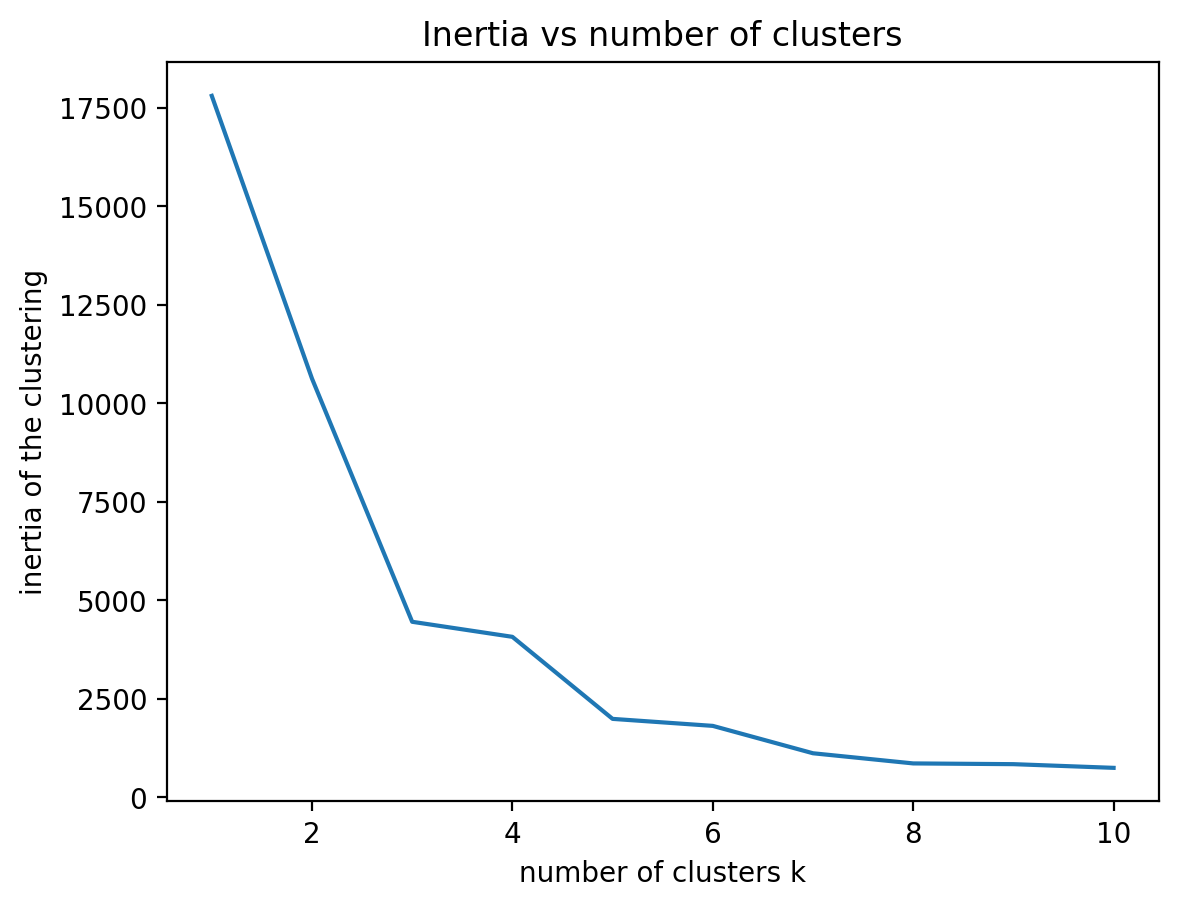

In [17]:
plot_inertia(X)

In all of these cases, we can see that the knee point of the 'Inertia vs number of clusters' graph corresponded to the number of centers generated with the make_blobs function. This shows that this method of identifying the desired number of clusters with knee point detection provides good results (at least in the cases seen above).

## DBSCAN clustering algorithm 

Let's generate four Gaussian blobs with a line of points connecting two of them. This will be used to illustrate the usage of DBSCAN in sklearn. 

In [58]:
def make_blobs_with_line():
    X, labels = make_blobs(n_samples=500, centers = [[1, 2], [1, 3], [2.5, 3], [6,0]], 
                           cluster_std = 0.2, random_state=216)

    n_point_line = 64
    x0 = np.linspace(6,1,n_point_line)
    y0 = np.linspace(0,3,n_point_line)
    X_ = np.reshape([x0,y0],(2,n_point_line))

    X = np.concatenate((X_.T,X),axis=0)
    labels = np.concatenate(([-1] * n_point_line,labels),axis=0)
    
    return X, labels

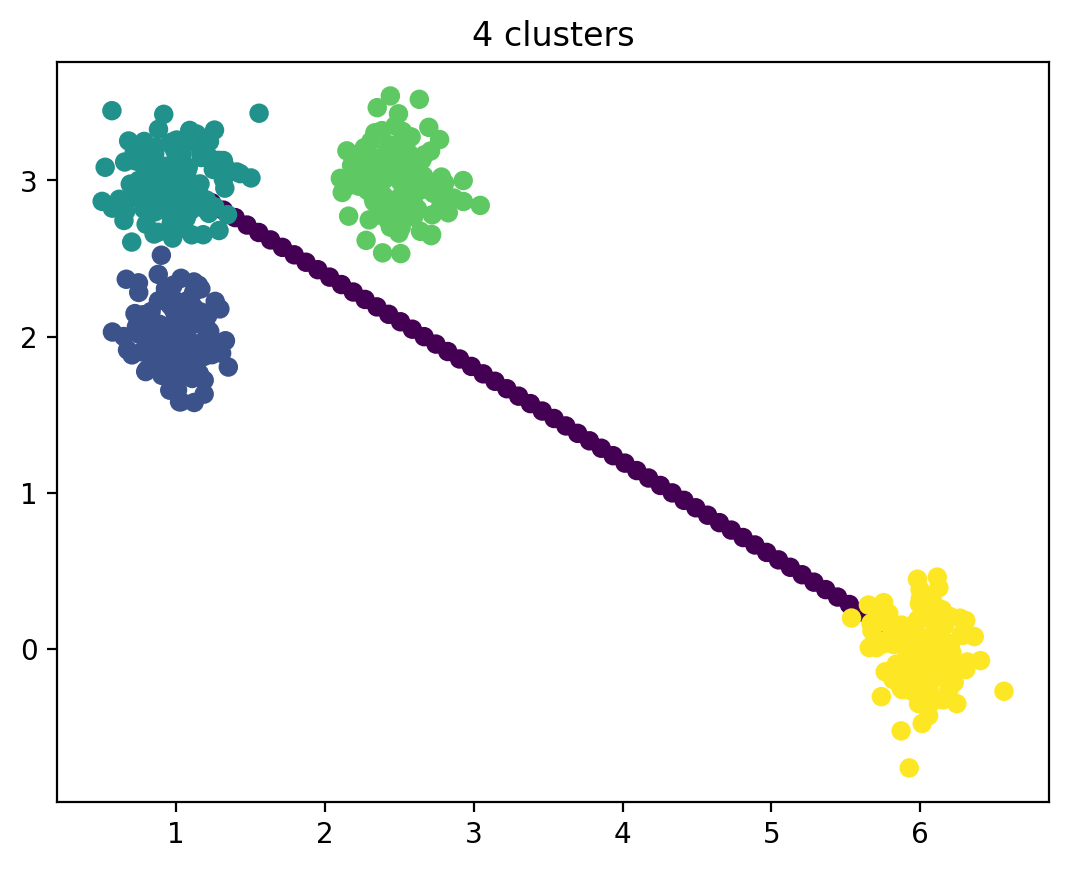

In [59]:
X, labels_truth = make_blobs_with_line()
scatter_blobs(X,labels_truth,"4 clusters")

First, run DBSCAN with the default parameters. 

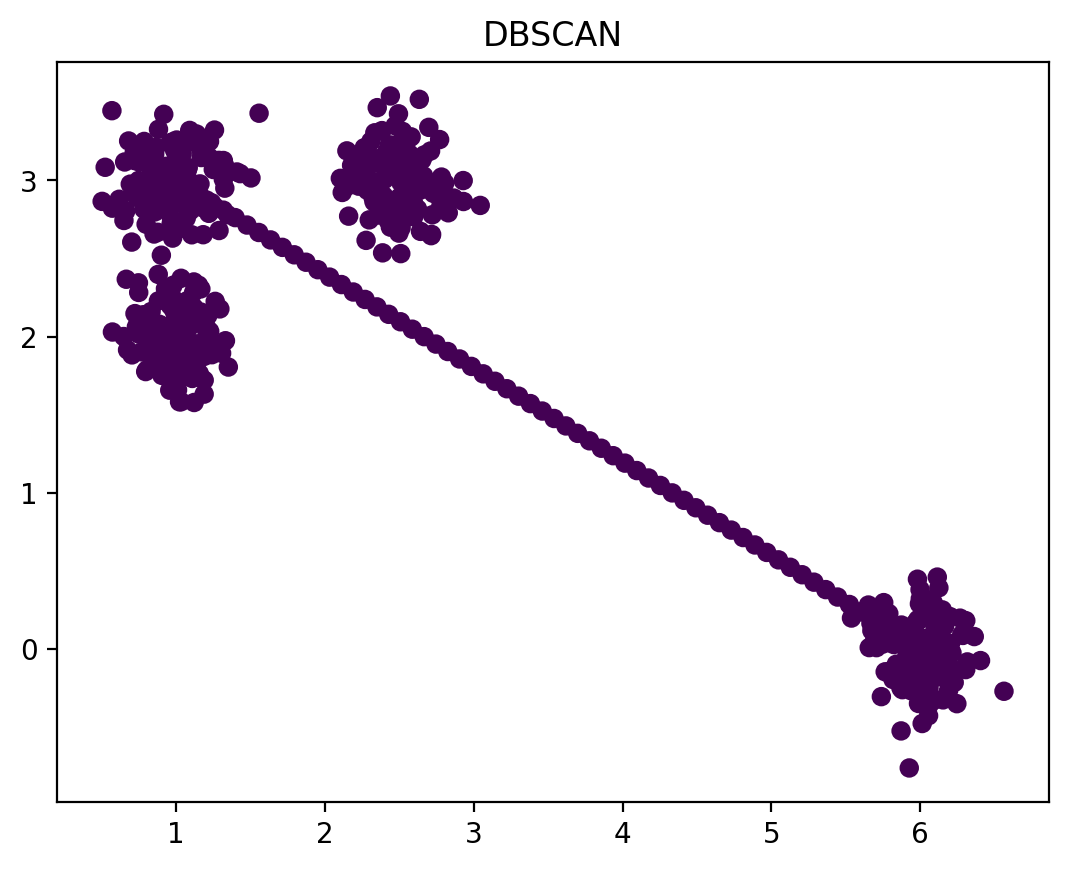

Estimated number of clusters: 1
Estimated number of noise points: 0


In [60]:
db = DBSCAN().fit(X)
scatter_blobs(X,db.labels_,"DBSCAN")

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Even though there are four clusters according to `make_blobs`, the default values in DBSCAN lead to a single cluster.

## Q3 DBSCAN hyperparameter search

There are two important hyperparameters `eps`, and `min_sample` you can choose to determine how many clusters you may end up with. Implement the function `grid_search()` to perform a grid search of different values of `eps` and `min_sample` to obtain the best clustering. 

In `grid_search()`, you should print out the number of clusters and the number of noise points after each DBSCAN computation. 

Use the function `plot_min_samples()` to graph the result of the clustering. 

A good pair `(eps, min_samples)` should give us the correct number of the clusters and very few noise points. 

In [61]:
class DBSCAN_hyperparameters:

    def __init__(self): 
        self.data_plotly = {"eps": [], "min_samples": [], "point_id": [], "x": [], "y": [], "label": [] }

    def write(self, X, eps, min_samples, labels): 
        """
        Saving the labels and other data to self.data_plotly.
        """
        for point_id, (X_, label) in enumerate(zip(X, labels)):
            self.data_plotly["eps"].append(eps)
            self.data_plotly["min_samples"].append(min_samples)
            self.data_plotly["point_id"].append(point_id)
            self.data_plotly["x"].append(X_[0])
            self.data_plotly["y"].append(X_[1])
            self.data_plotly["label"].append(label)
            
    def finalize(self):
        self.df = pd.DataFrame(self.data_plotly) # convert to panda dataframe
        return self
            
    def plot_min_samples(self, min_samples):
        """
        min_samples: integer scalar; this should be one of the values 
                     previously passed to search() in the list eps_ranges.
        """
        
        assert hasattr(self, 'df') and not self.df.empty, 'You need to run grid_search() before calling this function.'
        
        return px.scatter(self.df[self.df["min_samples"] == min_samples], 
                          title = f"min_samples = {min_samples}", 
                          x="x", y="y", animation_frame="eps", animation_group="point_id",
                          color="label", width=610, height= 600) 

In [62]:
def grid_search(X, eps_ranges=[0.1, 0.5], min_samples_ranges=[2, 10]):
    """
    Grid search to identify the best eps and min_samples.
    eps_ranges and min_samples_ranges should be lists of values to be used in the grid search.
    """
    
    db_hp = DBSCAN_hyperparameters() # required for plotting later on

    for min_samples in min_samples_ranges:  
        for eps in eps_ranges:        

            # Start your implementation here
              
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_
            n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
            n_noise_ = list(db.labels_).count(-1)
            print("eps = " + str(eps) + ", min_samples = " + str(min_samples))
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)
            print("---------------------------------------")

            # End your implementation here!
            
            # labels should be set equal to the DBSCAN labels you just computed.

            db_hp.write(X, eps, min_samples, labels) # save data for future plotting

    return db_hp.finalize() # return DBSCAN_hyperparameters for plotting with plot_min_samples()

## Q4 DBSCAN hyperparameter exploration and plotting

Test your implementation by running the following cell after you have filled in the proper values in a list for `chosen_eps_ranges` and `chosen_min_samples_ranges`. 

What pairs of the value `(eps, min_sample)` give you the best results? 

In [63]:
X, labels_truth = make_blobs_with_line()

In [64]:
chosen_eps_ranges = np.linspace(0.1, 0.3, 9) # Please fill in the empty list 
chosen_min_samples_ranges = [2, 5, 10]  # Please fill in the empty list 

DBSCAN_params = grid_search(X, chosen_eps_ranges, chosen_min_samples_ranges) 

eps = 0.1, min_samples = 2
Estimated number of clusters: 8
Estimated number of noise points: 23
---------------------------------------
eps = 0.125, min_samples = 2
Estimated number of clusters: 6
Estimated number of noise points: 12
---------------------------------------
eps = 0.15, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 5
---------------------------------------
eps = 0.175, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 4
---------------------------------------
eps = 0.2, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 4
---------------------------------------
eps = 0.22499999999999998, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 3
---------------------------------------
eps = 0.25, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 2
---------------------------------------
eps = 0.275, min_samples = 2
Es

In [25]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[0])

In [26]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[1])

In [27]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[2])

We can see that independantly from the minimum number of samples, having an epsilon value that is too high yields poor results. This can be explained by the fact that if epsilon is too high, clusters that are close to each other are considered as one cluster by the algorithm. 

Similarly, with a small epsilon we can see that if the minimum number of samples is too low, data that should be border points of a cluster can actually form a new small cluster. If the minimum number of samples is higher, this can lead to the whole outer part of a cluster being considered as an outer cluster (see figure above).

The y = -x line that is added is also interesting here, since the points are all close to each other - it is therefore easy for the algorithm to consider this data as part of one of the clusters at the extremities of the line if the parameters are not chosen well.

For this dataset, the parameters that seem to yield the best results would be an epsilon of 0.2 with a minimum number of samples of 10. In this situation, the clusters are well identified (apart from a few points which are considered as noise), and the y = -x is successfully identified as noise. This is confirmed by the grid search which shows that this configuration has 4 clusters and few noise points.

## Q5 Core, Border, Noise points in DBSCAN 

In the DBSCAN algorithm, the points can be classified as `core`, `border`, or `noise`.

A point p is regarded as a `core` point if at least `min_samples` are within distance `eps` of it (including p). 

A point q is a `border` point if it is within a `eps` neighborhood of a `core` point but itself is not a `core` point. 

A point o is a `noise` point if it is neither a `core` point nor a `border` point. 

See also the lecture slides for the definition of these terms.

Implement the function `DBSCAN_point_types(X, eps, min_samples)` using the function `DBSCAN` in sklearn to return the labels of the input `X`, the indices of the core points, the indices of the border points, and the indices of the noise points. All return variables should be of type `list`.

In [65]:
def DBSCAN_point_types(X, eps, min_samples): 
    # Start your implementation here.
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    core_points   = db.core_sample_indices_
    border_points = []
    noise_points  = []

    for index, label in enumerate(labels):
      if label == -1:
        noise_points.append(index)
      elif index not in core_points:
        border_points.append(index)

    return labels, core_points, border_points, noise_points

In [66]:
def draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices):
  
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[core_sample_indices] = True 

    border_samples_mask = np.zeros_like(labels, dtype=bool)
    border_samples_mask[border_indices] = True 
    
    noise_samples_mask = np.zeros_like(labels, dtype=bool)
    noise_samples_mask[noise_indices] = True     

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise point.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14
        )

        xy = X[class_member_mask & border_samples_mask] if k != -1 else X[class_member_mask & noise_samples_mask]
        plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6
        )
    plt.title(f"Number of DBSCAN clusters: {len(unique_labels)-1}")
    plt.show()
    
    print(f"Number of DBSCAN clusters: {len(unique_labels)-1:4}")
    print(f"Number of core points:     {len(core_sample_indices):4}")    
    print(f"Number of border points:   {len(border_indices):4}")    
    print(f"Number of noise points:    {len(noise_indices):4}")
    print(f"Number of points:          {X.shape[0]:4}")    

You are given the above function `draw_DBSCAN_point_types`. Run the following cell to test your implementation. 



In [67]:
X, labels_truth = make_blobs_with_line()

In [68]:
labels, core_sample_indices, border_indices, noise_indices = DBSCAN_point_types(X, 0.15, 10)

assert X.shape[0] == len(noise_indices) + len(border_indices) + len(core_sample_indices), "Inconsistency between the size of the set and the number of core+border+noise points"

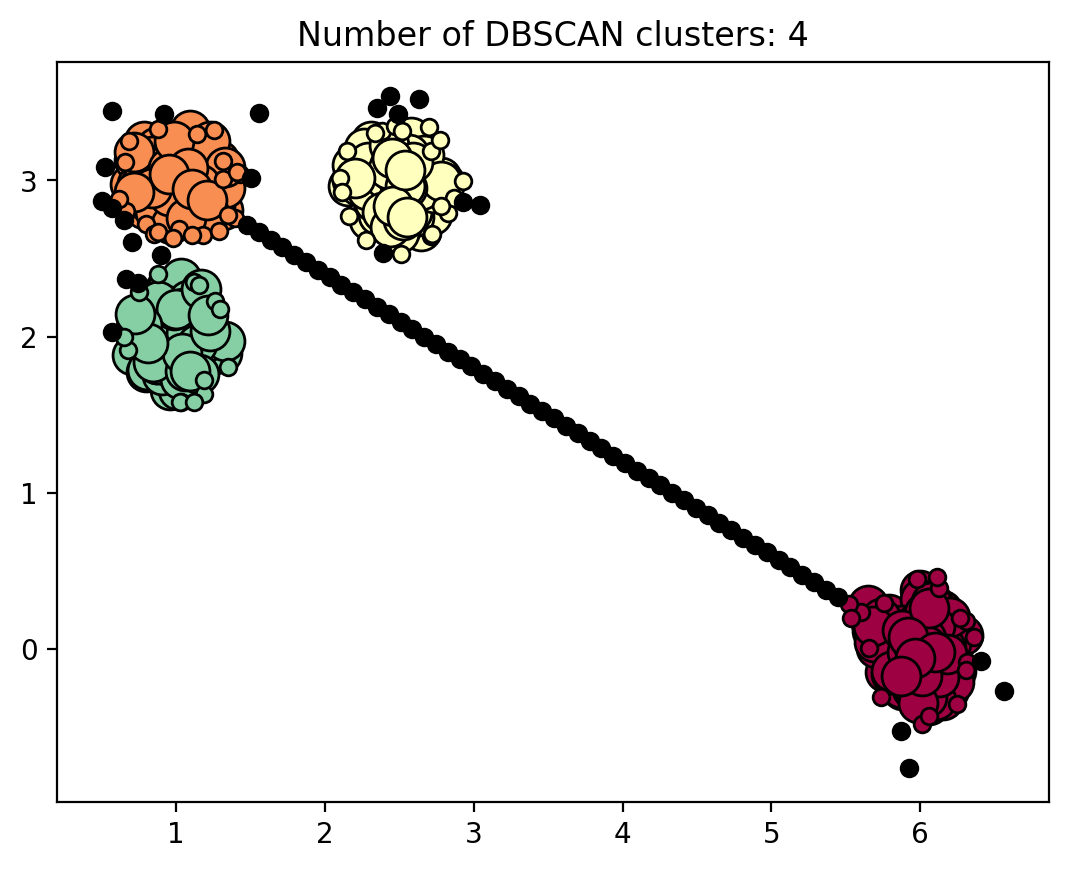

Number of DBSCAN clusters:    4
Number of core points:      418
Number of border points:     71
Number of noise points:      75
Number of points:           564


In [69]:
draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices)

## Q6 Anisotropically distributed blobs

You were given the following code to generate anisotropically distributed blobs. Run both the k-means algorithm you implemented in Q1 and DBSCAN from sklearn with the best hyperparameters you can find. You should use `DBSCAN_hyperparameter_search` for hyperparameter search for DBSCAN. 

Plot the clusters generated by DBSCAN and k-means. Comment and describe your observations. Which algorithm may be more suitable for this example and why?

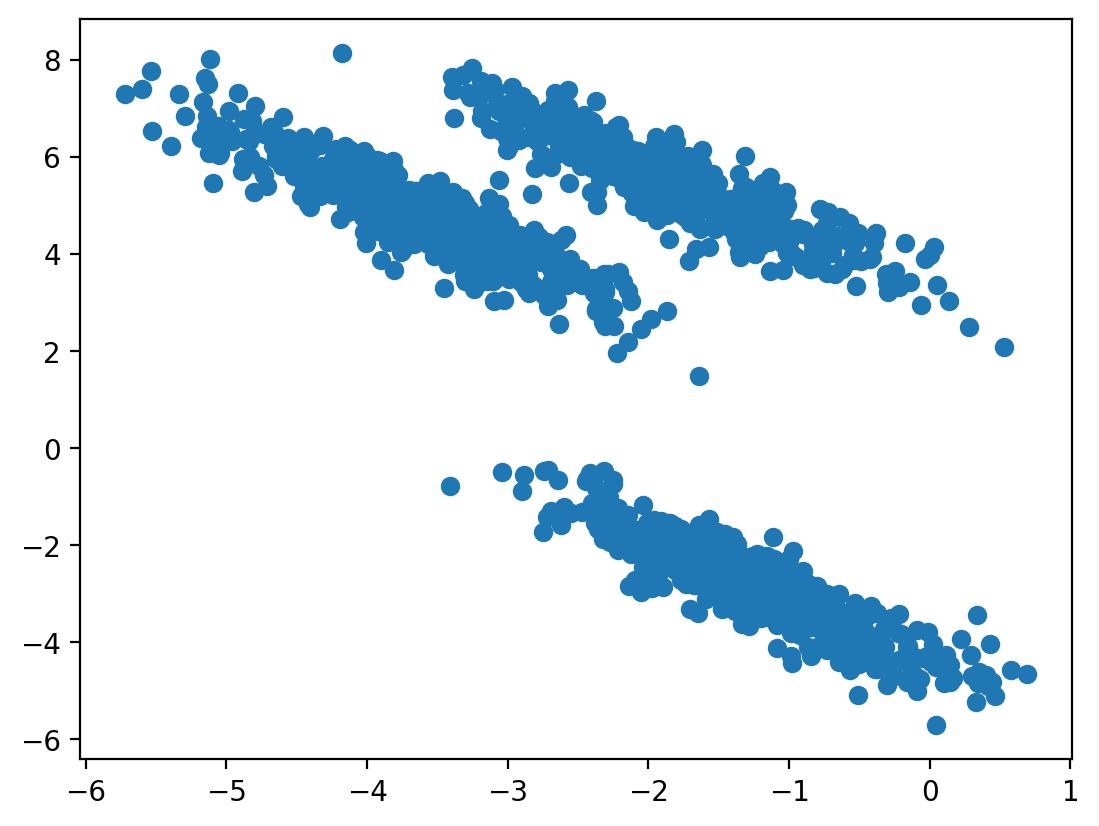

In [70]:
n_samples = 1500
random_state = 172
transformation = [[0.60834549, -0.5], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
plt.scatter(X_aniso[:,0], X_aniso[:,1])

In [71]:
chosen_eps_ranges = np.linspace(0.1, 1, 10)            # student should fill in those value 
chosen_min_samples_ranges = [2, 5, 10]    # student should fill in those value  

DBSCAN_params = grid_search(X_aniso, chosen_eps_ranges, chosen_min_samples_ranges) 

eps = 0.1, min_samples = 2
Estimated number of clusters: 110
Estimated number of noise points: 187
---------------------------------------
eps = 0.2, min_samples = 2
Estimated number of clusters: 16
Estimated number of noise points: 42
---------------------------------------
eps = 0.30000000000000004, min_samples = 2
Estimated number of clusters: 4
Estimated number of noise points: 16
---------------------------------------
eps = 0.4, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 7
---------------------------------------
eps = 0.5, min_samples = 2
Estimated number of clusters: 3
Estimated number of noise points: 3
---------------------------------------
eps = 0.6, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 2
---------------------------------------
eps = 0.7000000000000001, min_samples = 2
Estimated number of clusters: 2
Estimated number of noise points: 2
---------------------------------------
eps = 0.8, min_sa

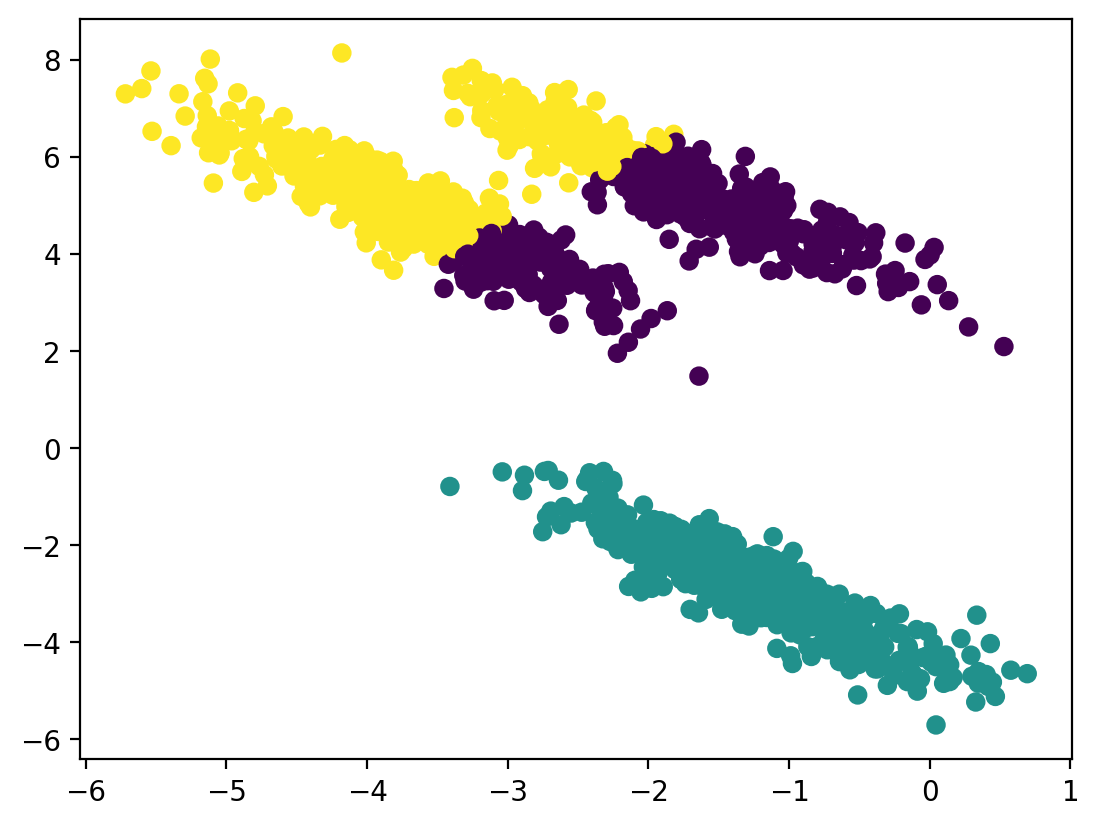

In [72]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_aniso) 
plt.scatter(X_aniso[:,0], X_aniso[:,1], c = centroid_idx)

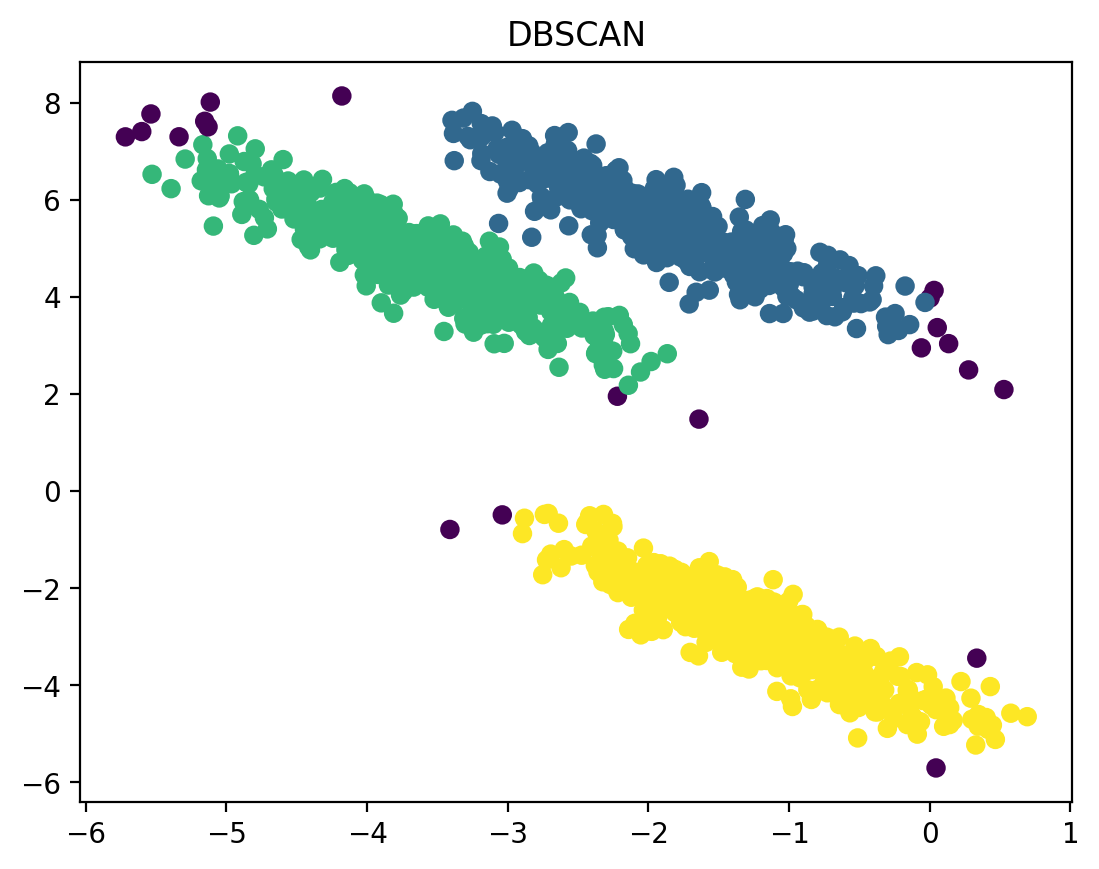

In [79]:
db = DBSCAN(eps=0.4,min_samples=10).fit(X_aniso) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_aniso,db.labels_,"DBSCAN")

For the kmeans algorithm, we can see that the clusters are poorly identified, since the two top clusters identifications are incorrect. 

For the DBScan, the parameters first had to be chosen. We know we want to have 3 clusters, have few noise points. The grid search shows the configurations that help us achieve the correct number of clusters, and we can visually choose the configuration that best identifies the clusters: eps = 0.4, min_samples = 10.
This method yields much better results, since the clusters are well identified, although some points are considered as noise and two points between the two top clusters are probably identified as part of the wrong cluster.

The DBScan method worked best, but it is important to note that this method required parameter tuning as opposed to kmeans - which would not be easy in a more complex problem.

## Q7 Blobs with different variances 

Repeat the previous study on this dataset.

In [74]:
n_samples = 1500
random_state = 172 

# Unequal variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3, 0.5], random_state=random_state)

In [121]:
chosen_eps_ranges = np.linspace(1, 2, 3) # student should fill in those values
chosen_min_samples_ranges = [20, 30, 40]
DBSCAN_params = grid_search(X_varied, chosen_eps_ranges, chosen_min_samples_ranges) 

eps = 1.0, min_samples = 20
Estimated number of clusters: 3
Estimated number of noise points: 232
---------------------------------------
eps = 1.5, min_samples = 20
Estimated number of clusters: 2
Estimated number of noise points: 69
---------------------------------------
eps = 2.0, min_samples = 20
Estimated number of clusters: 2
Estimated number of noise points: 18
---------------------------------------
eps = 1.0, min_samples = 30
Estimated number of clusters: 3
Estimated number of noise points: 373
---------------------------------------
eps = 1.5, min_samples = 30
Estimated number of clusters: 3
Estimated number of noise points: 117
---------------------------------------
eps = 2.0, min_samples = 30
Estimated number of clusters: 2
Estimated number of noise points: 34
---------------------------------------
eps = 1.0, min_samples = 40
Estimated number of clusters: 3
Estimated number of noise points: 456
---------------------------------------
eps = 1.5, min_samples = 40
Estimated

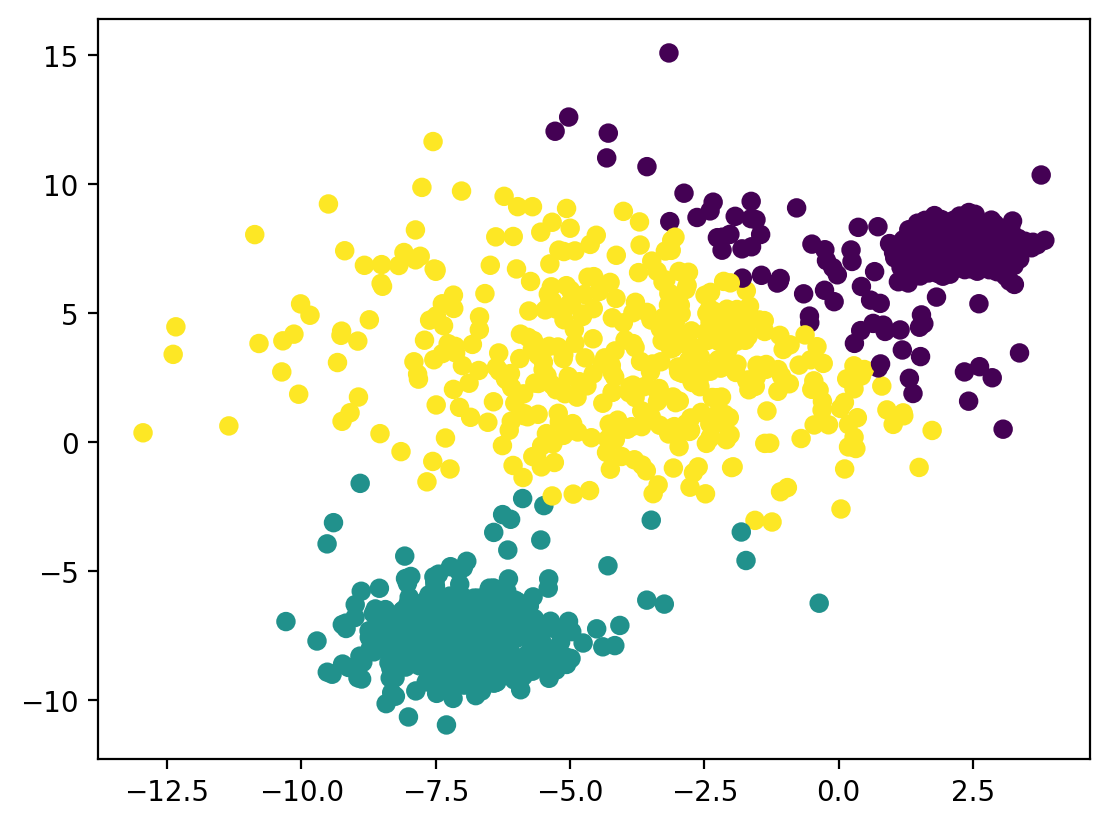

In [76]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_varied) 
plt.scatter(X_varied[:,0], X_varied[:,1], c = centroid_idx)

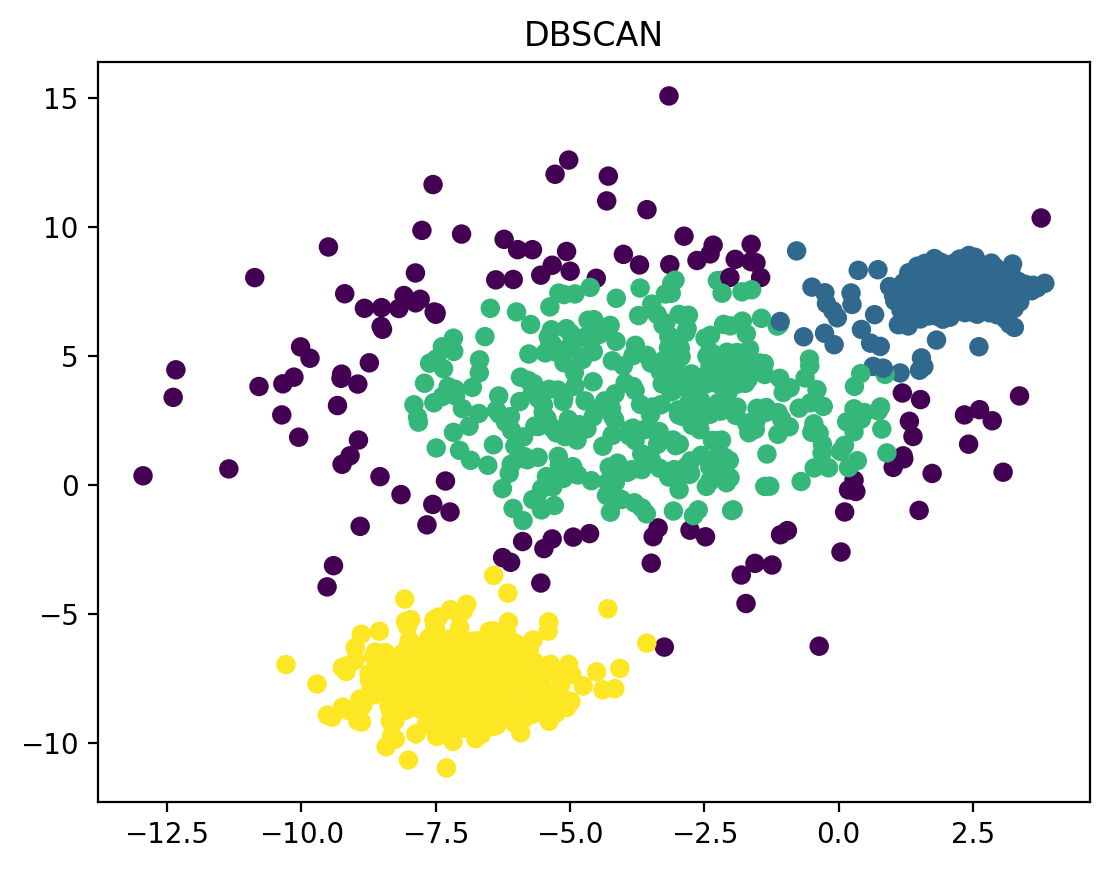

In [120]:
db = DBSCAN(eps=1.5,min_samples=30).fit(X_varied) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_varied,db.labels_,"DBSCAN")

This time, kmeans offers better performance compared to DBSCAN. Indeed, the three clusters are rather well identified with kmeans, apart from a small part of the central blob being attached to the top right blob.

However, DBSCAN performed rather poorly. The hyperparameters were more difficult to determine compared to the previous datasets, and the algorithm struggled to identify the middle cluster - a lot of its points are considered as noise. This is due to the fact that the three blobs have very different variances, but all clusters are computed with the same epsilon and min_samples. 
This time, since the center blob was spread out, a larger epsilon was needed (eps = 1.5). A larger epsilon led to the side clusters taking data from the central cluster. The min_samples value also had to be much larger, otherwise border points from the central cluster would be considered as a new cluster. A value of min_samples = 30 was used. 

## Q8 Blobs with outliers 

Repeat the previous study on this dataset.

In [122]:
def generate_gaussian_blobs_outliers(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=172)
    X_outlier = random.choices(np.arange(-50, 50, 0.01), k=60)
    X_outlier = np.reshape(X_outlier, (30,2))
    y_outlier = np.asarray([4] * 30)
    X = np.concatenate((X, X_outlier), axis=0)
    y = np.concatenate((y, y_outlier))  
    return X, y, "Gaussian blobs"

In [123]:
X_outlier, _, _ = generate_gaussian_blobs_outliers(500)

In [124]:
chosen_eps_ranges = [] # student should fill in those values
chosen_min_samples_ranges = []    # student should fill in those values

DBSCAN_params = grid_search(X_outlier, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges) 

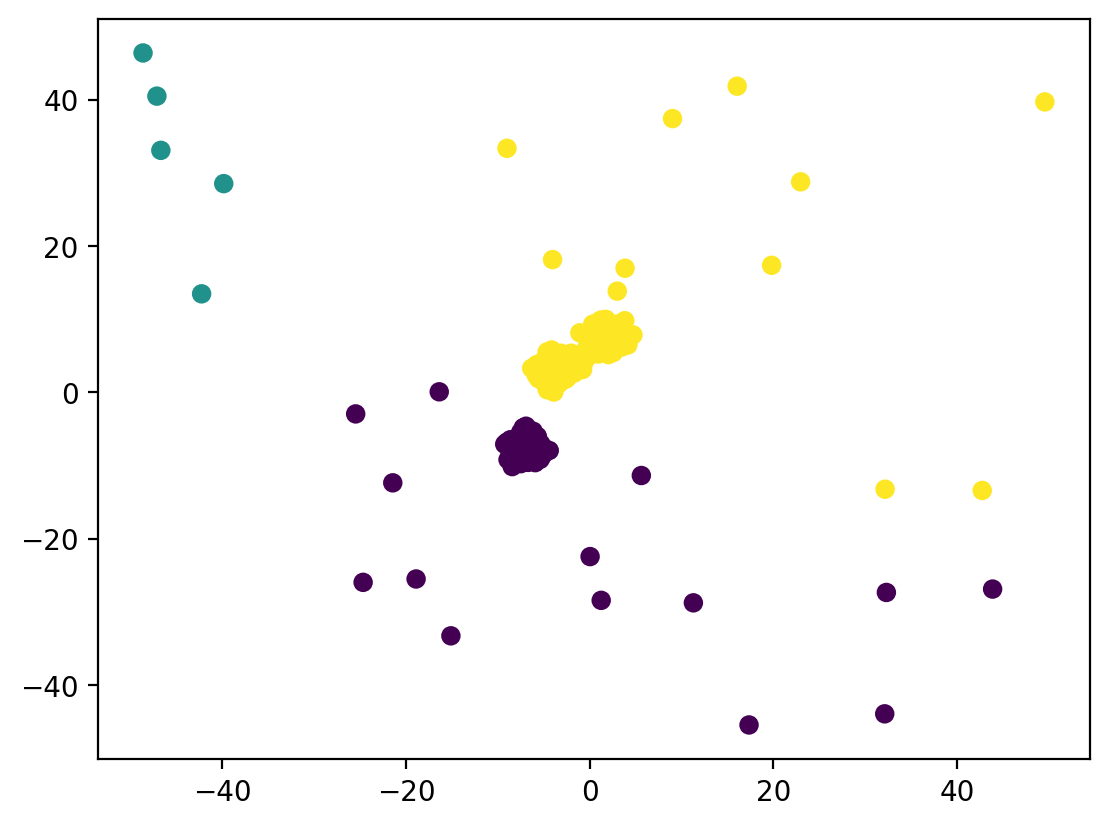

In [125]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_outlier) 
plt.scatter(X_outlier[:,0], X_outlier[:,1], c = centroid_idx)

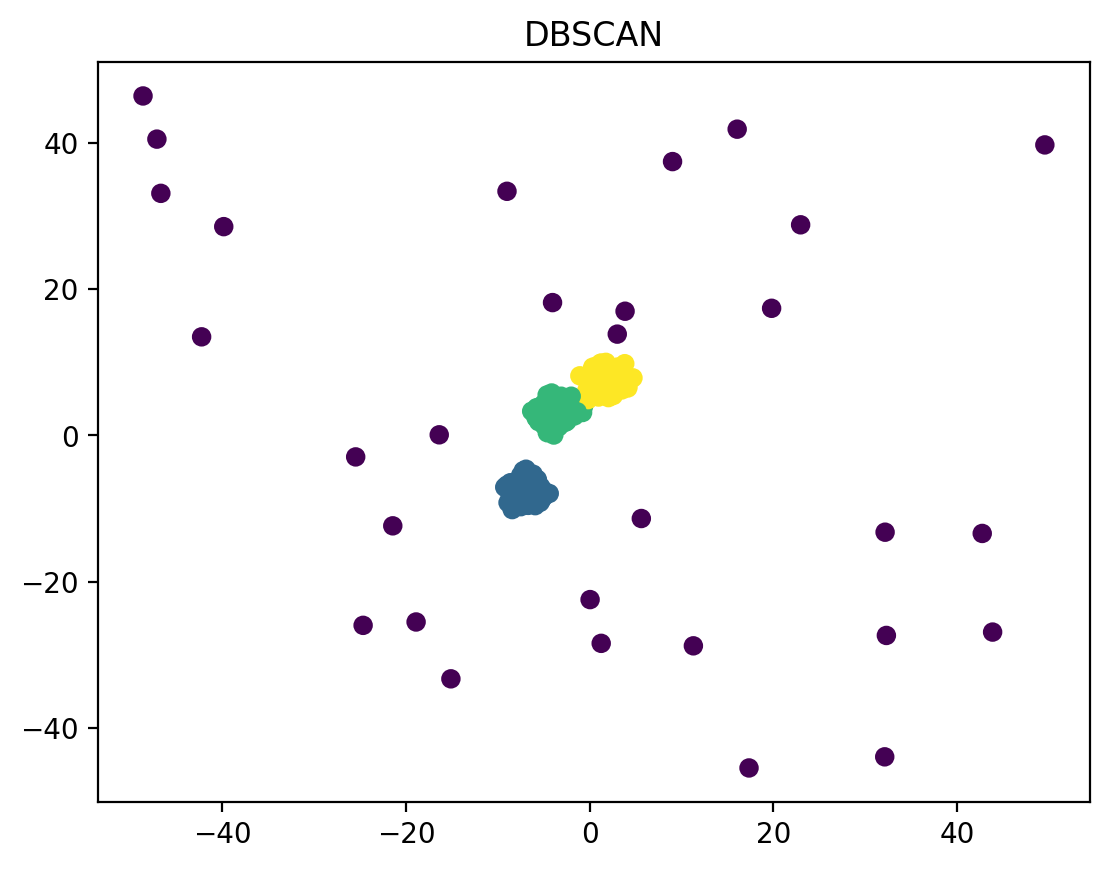

In [146]:
db = DBSCAN(eps= 1.4,min_samples= 10).fit(X_outlier) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_outlier,db.labels_,"DBSCAN")

In this example, kmeans performed poorly as it is 

## Q9 Concentric circles with noise 

Repeat the previous study on this dataset. 

In [ ]:
n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.4, noise=0.065)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

In [ ]:
X_circles, y_circles = noisy_circles 
plt.scatter(X_circles[:, 0], X_circles[:, 1])

In [ ]:
chosen_eps_ranges = [] # student should fill in those values
chosen_min_samples_ranges = []    # student should fill in those values

DBSCAN_params = grid_search(X_circles, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges ) 

In [ ]:
my_kmean = my_KMeans(n_clusters=2) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_circles) 
plt.scatter(X_circles[:,0], X_circles[:,1], c = centroid_idx)

In [ ]:
db = DBSCAN(eps= ,min_samples= ).fit(X_circles) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_circles,db.labels_,"DBSCAN")